Setup
======
First let's get some data to play around with.  Say we have total electricity data (GWe) from two different simulators (sim0, sim1) as a function of time [year] and reactor type (LWR, FR).

In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
mpl.rc('font', family='serif', size=11)
mpl.rc('savefig', bbox='tight')

make_fname_safe = lambda s: s.lower().replace(' ', '-')

In [2]:
S = 2
t = np.arange(2010, 2211)
tsims = np.concatenate([t]*S)

# simulator 0, DYMOND
gwe_lwr_sim0 = np.array([0, 0, 0, 0, 0, 0, 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9, 
                         10.8, 11.7, 12.6, 13.5, 16.87, 19.65, 23.18, 26.85, 30.37, 33.15, 
                         36.68, 39.45, 43.87, 46.65, 50.18, 53.85, 57.37, 60.15, 63.68, 67.35, 
                         70.87, 73.65, 78.08, 80.85, 84.37, 88.05, 91.58, 94.35, 97.87, 100.65, 
                         104.18, 106.95, 110.47, 114.15, 117.68, 120.45, 123.97, 127.65, 
                         131.18, 133.95, 138.37, 141.16, 144.67, 148.35, 148.5, 148.5, 148.5, 
                         148.5, 148.5, 148.5, 148.5, 148.5, 148.5, 148.5, 148.5, 148.5, 148.5, 
                         148.5, 148.5, 148.5, 148.5, 148.5, 148.5, 148.5, 148.5, 148.5, 148.5, 
                         148.5, 148.5, 148.5, 147.6, 146.7, 145.8, 144.9, 144, 143.1, 142.2, 
                         141.3, 140.4, 139.5, 137.7, 136.8, 135.9, 135, 131.63, 128.85, 125.32, 
                         121.65, 118.13, 115.35, 111.82, 109.05, 104.63, 101.85, 98.32, 94.65, 
                         91.13, 88.35, 84.82, 81.15, 77.63, 74.85, 70.42, 67.65, 64.13, 60.45, 
                         56.92, 54.15, 50.63, 47.85, 44.32, 41.55, 38.03, 34.35, 30.82, 28.05, 
                         24.53, 20.85, 17.32, 14.55, 10.13, 7.35, 3.82, 1.5E-01, 0, 0, 0, 0, 0, 
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                         0, 0, 0, 0, 0, 0, 0, 0]) + \
               np.array([90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 
                         90, 90, 90, 87.53, 85.65, 83.02, 81.15, 78.53, 76.65, 74.02, 72.15, 
                         69.53, 67.65, 65.02, 63.15, 60.53, 58.65, 56.02, 54.15, 51.53, 49.65,
                         47.02, 45.15, 42.53, 40.65, 38.02, 36.15, 33.53, 31.65, 29.02, 27.15,
                         24.53, 22.65, 20.02, 18.15, 15.53, 13.65, 11.02, 9.15, 6.53, 4.65, 
                         2.02, 1.5E-01, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                         0, 0, 0, 0, 0, 0, 0, 0])
gwe_fr_sim0 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.33, 0.36, 0.69, 
                        1.05, 1.41, 1.77, 2.13, 2.49, 2.85, 2.88, 3.21, 3.57, 3.93, 3.96, 
                        4.29, 4.65, 5.01, 5.37, 5.73, 5.76, 7.2, 8.64, 10.23, 12, 13.47, 15.24,
                        16.71, 18.48, 19.95, 21.75, 23.55, 25.32, 26.79, 28.59, 30.39, 32.19, 
                        33.99, 35.79, 37.62, 39.75, 41.55, 43.35, 45.18, 47.31, 49.14, 51.27, 
                        54.15, 57.03, 59.94, 62.82, 65.7, 68.94, 71.82, 75.06, 77.94, 81.18, 
                        85.14, 88.05, 91.29, 94.5, 100.08, 105.18, 111.18, 117.06, 123.12, 
                        128.22, 134.25, 139.38, 146.49, 151.62, 157.68, 163.86, 169.95, 
                        175.41, 181.77, 187.98, 194.07, 199.53, 206.97, 212.49, 218.85, 
                        225.09, 231.51, 237.33, 243.72, 249.57, 255.96, 261.81, 268.26, 275.13,
                        281.58, 287.4, 294.18, 301.08, 307.83, 313.71, 321.54, 327.72, 334.5, 
                        332.54, 327.2, 333.49, 336.29, 348.89, 351.74, 362.82, 365.72, 370.02, 
                        373.65, 377.58, 381.21, 385.14, 388.77, 392.73, 396.69, 400.65, 404.61,
                        408.6, 412.89, 416.88, 421.2, 425.49, 429.48, 433.8, 438.12, 442.47, 
                        447.12, 451.47, 456.12, 460.47, 465.15, 469.83, 474.51, 479.22, 484.23,
                        488.94, 493.95, 498.66, 503.7, 508.74, 513.78, 518.85, 524.22, 529.29, 
                        534.69, 540.09, 545.49, 550.89, 556.32, 562.05, 567.48, 573.24, 579, 
                        584.76, 590.55, 596.64, 602.43, 608.55, 614.67, 620.79, 626.94])
gwe_sim0 = gwe_lwr_sim0 + gwe_fr_sim0

# simulator 1, Cyclus
gwe_lwr_sim1 = np.array([94, 94, 94, 94, 94, 95, 96, 97, 98, 99, 100, 103, 104, 105, 106, 108, 
                         108, 109, 108, 109, 113, 116, 121, 124, 128, 131, 134, 139, 143, 146, 
                         151, 149, 152, 151, 156, 155, 158, 159, 161, 162, 166, 165, 169, 169, 
                         172, 170, 175, 175, 178, 181, 181, 181, 184, 186, 187, 189, 191, 191, 
                         195, 194, 192, 191, 189, 186, 183, 183, 180, 178, 179, 173, 173, 173, 
                         172, 169, 167, 165, 162, 161, 158, 156, 157, 157, 156, 155, 157, 155, 
                         154, 154, 149, 150, 151, 151, 150, 149, 148, 145, 145, 143, 142, 142, 
                         138, 134, 129, 127, 122, 119, 116, 111, 108, 109, 103, 101, 96, 94, 
                         88, 86, 80, 78, 73, 71, 64, 63, 58, 55, 51, 49, 43, 43, 40, 37, 33, 
                         30, 25, 22, 18, 14, 10, 7, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                         0, 0, 0], dtype='f8')
gwe_fr_sim1 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.4, 0.4, 0.8, 1.2, 
                        1.6, 2, 2.4, 2.8, 3.2, 3.2, 3.6, 4, 4, 4.4, 4.8, 4.8, 5.6, 5.6, 6.4, 
                        8, 9.2, 11.2, 13.2, 14.8, 16.8, 18, 20.4, 22, 19.2, 26, 25.6, 29.6, 
                        31.6, 28.8, 35.6, 35.2, 39.6, 39.6, 38.8, 45.6, 45.2, 49.6, 49.6, 
                        48.8, 53.6, 53.2, 62, 63.2, 63.6, 69.6, 69.6, 78.4, 80, 80.4, 86.8, 
                        87.6, 96.4, 98, 98.8, 105.2, 108, 118.8, 124, 127.2, 136.4, 138, 
                        150.4, 155.2, 159.2, 168, 170, 151.2, 188, 191.2, 194, 202.8, 184.8,
                        222, 226.4, 221.2, 238, 219.6, 256.4, 260, 223.2, 250, 254, 290, 
                        296.4, 258, 313.6, 289.2, 266.4, 331.2, 294.4, 350.8, 327.6, 303.2, 
                        370, 332.4, 382.8, 357.2, 330.4, 319.6, 353.2, 380.8, 330.8, 350.8, 
                        341.2, 374.8, 389.6, 352.4, 340, 364, 301.6, 410.8, 365.2, 364.4, 
                        388.8, 328.8, 421.2, 378, 390.4, 414.8, 357.2, 446, 406.4, 418.8, 
                        443.2, 388.8, 462.8, 435.2, 425.6, 472.8, 422.4, 489.6, 465.2, 447.2, 
                        454.4, 410.4, 516, 472.8, 482, 488.8, 593.6, 588.4, 509.2, 518.8, 
                        525.6, 611.6, 619.2, 546.4, 522.4, 649.2, 644, 651.2, 585.6, 562.8, 
                        670.4, 677.6, 525.6])
gwe_sim1 = gwe_lwr_sim1 + gwe_fr_sim1

In [3]:
def gwe_plot(t, lwr, fr, sim, colors=('purple', 'green')):
    plt.stackplot(t, lwr, fr, colors=colors)
    ax = plt.axis()
    plt.axis([t[0], t[-1], 0.0, ax[3]])
    plwr = mpatches.Patch(color=colors[0], label='LWR')
    pfr = mpatches.Patch(color=colors[1], label='FR')
    plt.xticks(np.linspace(t[0], t[-1], 5))
    plt.legend(handles=[plwr, pfr], loc='upper left')
    plt.xlabel('Time [years]')
    plt.ylabel('Generated Power [GWe]')
    plt.title(sim)
    fbase = 'gwe-' + sim.lower()
    plt.savefig(fbase + '.eps')
    plt.savefig(fbase + '.png')

/home/scopatz/miniconda/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


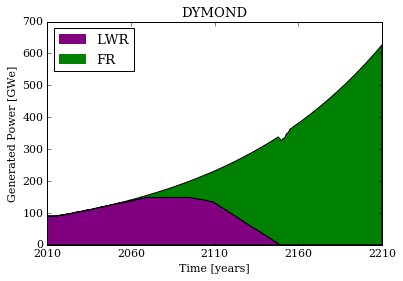

In [4]:
gwe_plot(t, gwe_lwr_sim0, gwe_fr_sim0, 'DYMOND')

/home/scopatz/miniconda/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


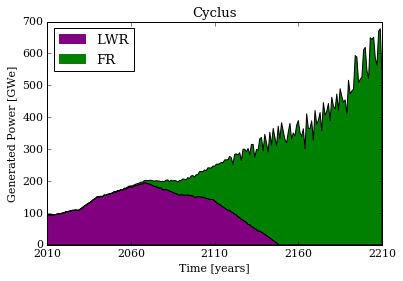

In [5]:
gwe_plot(t, gwe_lwr_sim1, gwe_fr_sim1, 'Cyclus')

Gaussin Process Models
=============
Now let's create gaussian process models across the simulators.

In [6]:
import george
import george.kernels
from george.kernels import ExpSquaredKernel
import scipy.optimize as op

In [7]:
# Set up the Gaussian process.
def init_gp(t, y, yerr):
    y_mean = np.mean(y)
    kernel = float(y_mean) * ExpSquaredKernel(1.0)
    gp = george.GP(kernel, mean=y_mean)
    gp.compute(t, yerr=yerr, sort=False)
    return gp

def negloglikelihood(gp, y, hyperparams):
    gp.kernel[:] = hyperparams
    ll = gp.lnlikelihood(y, quiet=True)
    return -ll if np.isfinite(ll) else 1e25  # mask infinites

def grad_negloglikelihood(gp, y, hyperparams):
    gp.kernel[:] = hyperparams
    gll = gp.grad_lnlikelihood(y, quiet=True)
    #gll[~np.isfinite(gll)] = 0.0
    return -gll

def optimize_hyperparams(gp, y):
    hp0 = gp.kernel.vector
    # form some closures
    nll = lambda hp: negloglikelihood(gp, y, hp)
    grad_nll = lambda hp: grad_negloglikelihood(gp, y, hp)
    results = op.minimize(nll, hp0, jac=grad_nll)
    gp.kernel[:] = results.x
    
def model(t, y, tstar, yerr=1e-6):
    gp = init_gp(t, y, yerr)
    optimize_hyperparams(gp, y)
    mu, cov = gp.predict(y, tstar)
    std = np.sqrt(np.diag(cov))
    return mu, std, gp

In [8]:
def model_plot(t, y, yerr, tpred, mu, std, title=None, ymax=None, show_title=True):
    fig = plt.figure(figsize=(8, 8))
    T = len(t) / 2
    plt.errorbar(t[:T], y[:T], yerr if yerr is None else yerr[:T], fmt='r.', label='DYMOND')
    plt.errorbar(t[T:], y[T:], yerr if yerr is None else yerr[T:], fmt='rx', label='Cyclus')
    plt.plot(tpred, mu, 'k-', label='model')
    plt.fill_between(tpred, mu - 2*std, mu + 2*std, color='gray')
    ax = plt.axis()
    plt.axis([tpred[0], tpred[-1], 0.0, ymax or ax[3]])
    plt.xticks(np.linspace(tpred[0], tpred[-1], 5))
    plt.legend(loc=0)
    plt.xlabel('Time [year]')
    plt.ylabel('Generated Power [GWe]')
    if title and show_title:
        plt.title(title)
    fbase = 'gwe-model-' + (title or '').lower().replace(' ', '-')
    plt.savefig(fbase + '.eps')
    plt.savefig(fbase + '.png')

In [9]:
gwe_lwr_y = np.concatenate([gwe_lwr_sim0, gwe_lwr_sim1])
gwe_lwr_mu, gwe_lwr_std, gwe_lwr_gp = model(tsims, gwe_lwr_y, t)
gwe_lwr_gp.kernel.vector

/home/scopatz/.local/lib/python3.5/site-packages/george-0.2.1-py3.5-linux-x86_64.egg/george/kernels.py:85: RuntimeWarning: overflow encountered in exp
  self.pars = np.exp(v)
/home/scopatz/.local/lib/python3.5/site-packages/george-0.2.1-py3.5-linux-x86_64.egg/george/kernels.py:85: RuntimeWarning: overflow encountered in exp
  self.pars = np.exp(v)


array([ 4.41214981,  0.        ])

/home/scopatz/miniconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/scopatz/miniconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


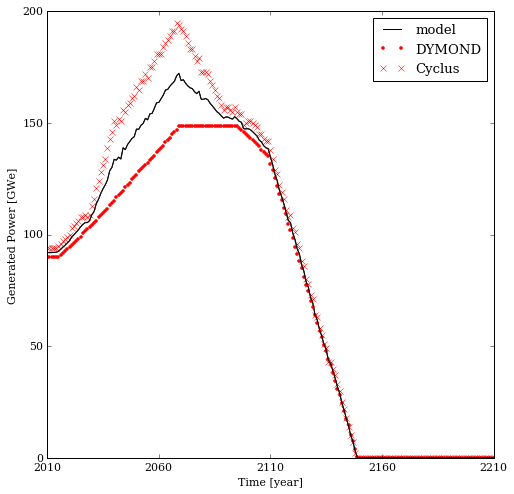

In [10]:
model_plot(tsims, gwe_lwr_y, None, t, gwe_lwr_mu, gwe_lwr_std, title='LWR', show_title=False)

In [11]:
gwe_fr_y = np.concatenate([gwe_fr_sim0, gwe_fr_sim1])
gwe_fr_mu, gwe_fr_std, gwe_fr_gp = model(tsims, gwe_fr_y, t)
gwe_fr_gp.kernel.vector

/home/scopatz/.local/lib/python3.5/site-packages/george-0.2.1-py3.5-linux-x86_64.egg/george/kernels.py:85: RuntimeWarning: overflow encountered in exp
  self.pars = np.exp(v)
/home/scopatz/.local/lib/python3.5/site-packages/george-0.2.1-py3.5-linux-x86_64.egg/george/kernels.py:81: RuntimeWarning: divide by zero encountered in log
  return np.log(self.pars)
/home/scopatz/.local/lib/python3.5/site-packages/george-0.2.1-py3.5-linux-x86_64.egg/george/kernels.py:81: RuntimeWarning: divide by zero encountered in log
  return np.log(self.pars)
/home/scopatz/.local/lib/python3.5/site-packages/george-0.2.1-py3.5-linux-x86_64.egg/george/kernels.py:85: RuntimeWarning: overflow encountered in exp
  self.pars = np.exp(v)
/home/scopatz/.local/lib/python3.5/site-packages/george-0.2.1-py3.5-linux-x86_64.egg/george/kernels.py:81: RuntimeWarning: divide by zero encountered in log
  return np.log(self.pars)


array([ 5.26781469,  0.        ])

/home/scopatz/miniconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/scopatz/miniconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


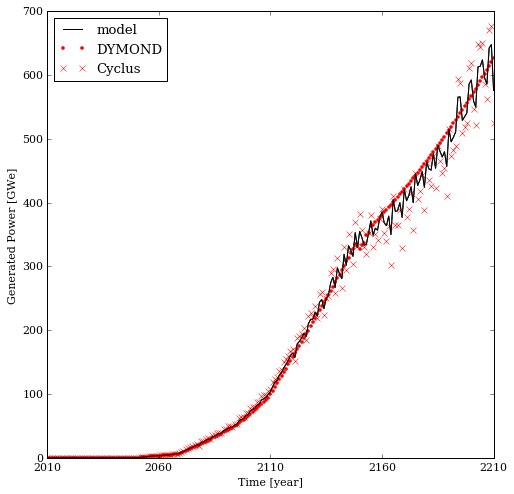

In [12]:
model_plot(tsims, gwe_fr_y, None, t, gwe_fr_mu, gwe_fr_std, title='FR', show_title=False)

In [13]:
gwe_y = np.concatenate([gwe_sim0, gwe_sim1])
gwe_mu, gwe_std, gwe_gp = model(tsims, gwe_y, t)
gwe_gp.kernel.vector

/home/scopatz/.local/lib/python3.5/site-packages/george-0.2.1-py3.5-linux-x86_64.egg/george/kernels.py:85: RuntimeWarning: overflow encountered in exp
  self.pars = np.exp(v)
/home/scopatz/.local/lib/python3.5/site-packages/george-0.2.1-py3.5-linux-x86_64.egg/george/kernels.py:81: RuntimeWarning: divide by zero encountered in log
  return np.log(self.pars)
/home/scopatz/.local/lib/python3.5/site-packages/george-0.2.1-py3.5-linux-x86_64.egg/george/kernels.py:137: RuntimeWarning: invalid value encountered in multiply
  return g * self.vector_gradient[None, None, :]
/home/scopatz/.local/lib/python3.5/site-packages/george-0.2.1-py3.5-linux-x86_64.egg/george/kernels.py:85: RuntimeWarning: overflow encountered in exp
  self.pars = np.exp(v)
/home/scopatz/.local/lib/python3.5/site-packages/george-0.2.1-py3.5-linux-x86_64.egg/george/kernels.py:81: RuntimeWarning: divide by zero encountered in log
  return np.log(self.pars)
/home/scopatz/.local/lib/python3.5/site-packages/george-0.2.1-py3.5-lin

array([ 5.62198687,  0.        ])

/home/scopatz/miniconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/scopatz/miniconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


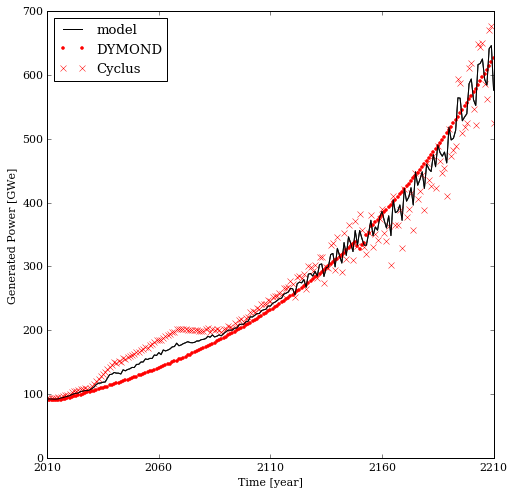

In [14]:
model_plot(tsims, gwe_y, None, t, gwe_mu, gwe_std, title='Total', show_title=False)

In [15]:
offset = 5
step = 40
t_werr = np.concatenate([t[::step], t[offset::step]])
gwe_werr_y = np.concatenate([gwe_sim0[::step], gwe_sim1[offset::step]])
#gwe_werr_yerr = 0.2 * gwe_werr_y
gwe_werr_yerr = (1.01**((t_werr-2010)/10) - 1.0) * gwe_werr_y
gwe_werr_mu, gwe_werr_std, gwe_werr_gp = model(t_werr, gwe_werr_y, t, yerr=gwe_werr_yerr)
gwe_werr_gp.kernel.vector

/home/scopatz/miniconda/lib/python3.5/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in sqrt


array([ 9.72744984,  6.01717025])

/home/scopatz/miniconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/scopatz/miniconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


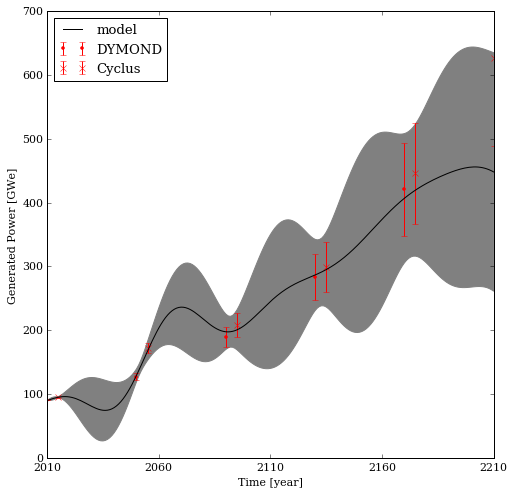

In [16]:
model_plot(t_werr, gwe_werr_y, gwe_werr_yerr, t, gwe_werr_mu, gwe_werr_std, 
           title='Total with Uncertainty', ymax=700, show_title=False)

Dynamic Time Warpping
============
Now let's sequences to their various components.

In [17]:
import dtw

In [18]:
def contribution(x, dist):
    n = len(x)
    max_cost = dtw.l1(x, np.zeros(n)) / (2*n)
    c = 1.0 - (dist / max_cost)
    return c

def contribution_alt(x, dist):
    n = x.shape
    max_cost = dtw.l1(x, np.zeros(n)) / np.sum(n)
    c = 1.0 - (dist / max_cost)
    return c

def contribution_over_time(x, cost):
    two_n = 2*np.arange(1, len(x)+1) 
    dists = np.diagonal(cost) / two_n
    max_costs = np.fromiter((dtw.l1(x[:i], np.zeros(i))/two_n[i-1] for i in range(1, len(x)+1)), 
                            dtype='f8', count=len(x))
    conts = 1.0 - (dists/max_costs)
    return conts

def display_dwt(x, dist, cost, path, xname, yname, offset=2010, vmax=None):
    fig = plt.figure(figsize=(8, 6))
    cost1 = cost[1:, 1:]
    extent = (offset, offset+cost1.shape[1], offset, offset+cost1.shape[0])
    plt.imshow(cost1[::-1], cmap='viridis', extent=extent, vmin=0.0, vmax=vmax)
    w = offset + path
    plt.plot(w[1], w[0], 'w-')
    plt.axis(extent)
    plt.xticks(np.asarray(np.linspace(extent[0], extent[1], 5), int))
    plt.yticks(np.asarray(np.linspace(extent[2], extent[3], 5), int))
    cb = plt.colorbar()
    cb.set_label('Cost [GWe]', rotation=-90, va='bottom')
    plt.xlabel('Time [year]')
    plt.ylabel('Time [year]')
    fname = 'cost-{0}-to-{1}'.format(make_fname_safe(xname), make_fname_safe(yname))
    plt.savefig(fname + '.png')
    plt.savefig(fname + '.eps')
    sc = cost.max() / sum(cost.shape)
    cont = contribution(x, dist)
    cont_t = contribution_over_time(x, cost)
    print('Warping between {0} and {1}:'.format(xname, yname))
    print('  Distance is ', dist)
    print('  Max cost over max path length is ', sc)
    print('  Frac of max scale is ', dist/sc)
    print('  Contribution is', cont)
    return cont, cont_t

Warping between LWR Model and LWR DYMOND:
  Distance is  1.45192575565
  Max cost over max path length is  31.6623834931
  Frac of max scale is  0.0458564894828
  Contribution is 0.96478449824


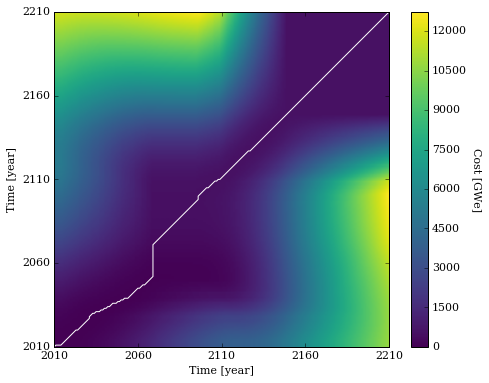

In [19]:
dist, cost, path = dtw.dtw(gwe_lwr_mu[:,np.newaxis], gwe_lwr_sim0[:,np.newaxis])
cont, cont_t = display_dwt(gwe_lwr_mu, dist, cost, path, 'LWR Model', 'LWR DYMOND')

Warping between LWR Model and LWR Cyclus:
  Distance is  1.05347903824
  Max cost over max path length is  34.8623827727
  Frac of max scale is  0.030218216727
  Contribution is 0.974448560623


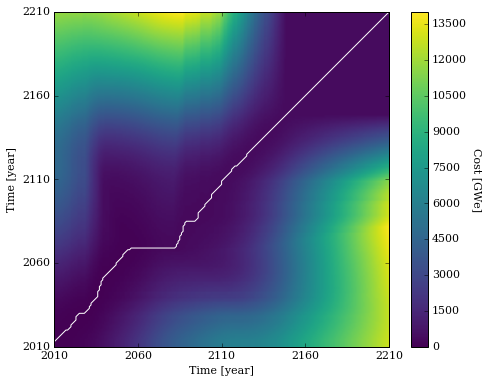

In [20]:
dist, cost, path = dtw.dtw(gwe_lwr_mu[:,np.newaxis], gwe_lwr_sim1[:,np.newaxis])
cont, cont_t = display_dwt(gwe_lwr_mu, dist, cost, path, 'LWR Model', 'LWR Cyclus')

Warping between FR Model and FR DYMOND:
  Distance is  2.78331435564
  Max cost over max path length is  97.649278607
  Frac of max scale is  0.0285031737597
  Contribution is 0.971312324933


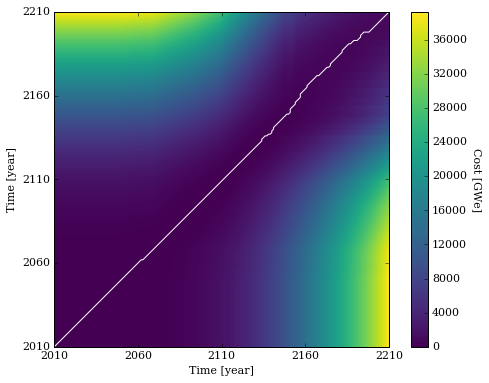

In [21]:
dist, cost, path = dtw.dtw(gwe_fr_mu[:,np.newaxis], gwe_fr_sim0[:,np.newaxis])
cont, cont_t = display_dwt(gwe_fr_mu, dist, cost, path, 'FR Model', 'FR DYMOND')

Warping between FR Model and FR Cyclus:
  Distance is  3.73224580214
  Max cost over max path length is  97.0212591002
  Frac of max scale is  0.0384683298975
  Contribution is 0.961531670102


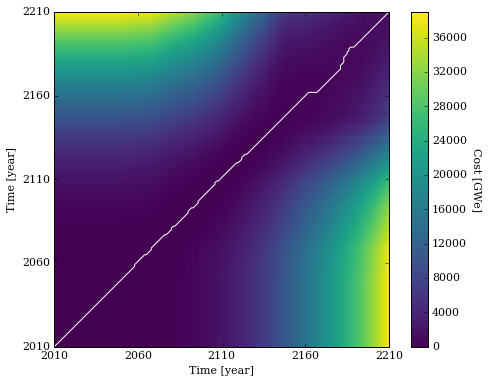

In [22]:
dist, cost, path = dtw.dtw(gwe_fr_mu[:,np.newaxis], gwe_fr_sim1[:,np.newaxis])
cont, cont_t = display_dwt(gwe_fr_mu, dist, cost, path, 'FR Model', 'FR Cyclus')

Warping between Total Model and Total DYMOND:
  Distance is  3.021906533
  Max cost over max path length is  93.1997733986
  Frac of max scale is  0.0324239686729
  Contribution is 0.97813378084


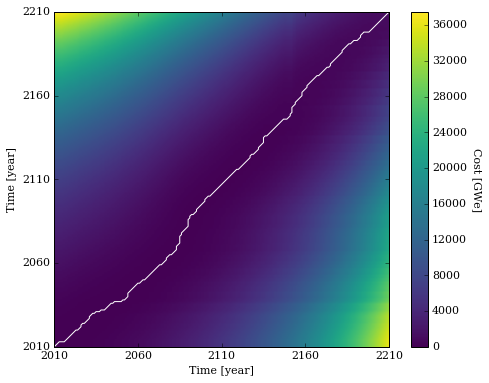

In [23]:
dist, cost, path = dtw.dtw(gwe_mu[:,np.newaxis], gwe_sim0[:,np.newaxis])
cont, cont_t = display_dwt(gwe_mu, dist, cost, path, 'Total Model', 'Total DYMOND')

Warping between Total Model and Total Cyclus:
  Distance is  3.98410831463
  Max cost over max path length is  94.2733162313
  Frac of max scale is  0.0422612513689
  Contribution is 0.97117138316


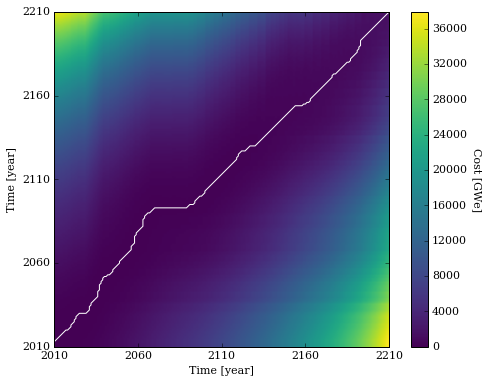

In [24]:
dist, cost, path = dtw.dtw(gwe_mu[:,np.newaxis], gwe_sim1[:,np.newaxis])
cont, cont_t = display_dwt(gwe_mu, dist, cost, path, 'Total Model', 'Total Cyclus')

Warping between Total Model and LWR Model:
  Distance is  97.0098550291
  Max cost over max path length is  97.0098550291
  Frac of max scale is  1.0
  Contribution is 0.298046207722


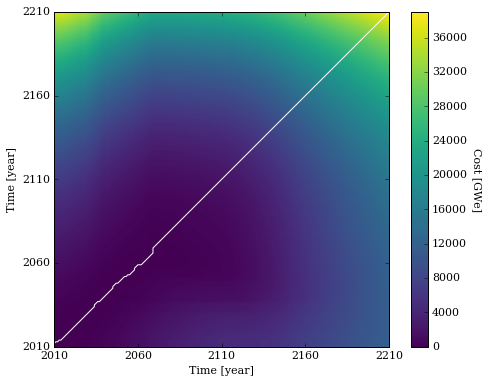

In [25]:
dist, cost, path = dtw.dtw(gwe_mu[:,np.newaxis], gwe_lwr_mu[:,np.newaxis])
cont, cont_lwr_t = display_dwt(gwe_mu, dist, cost, path, 'Total Model', 'LWR Model')

Warping between Total Model and FR Model:
  Distance is  19.5033485159
  Max cost over max path length is  138.199773399
  Frac of max scale is  0.141124316171
  Contribution is 0.858875683829


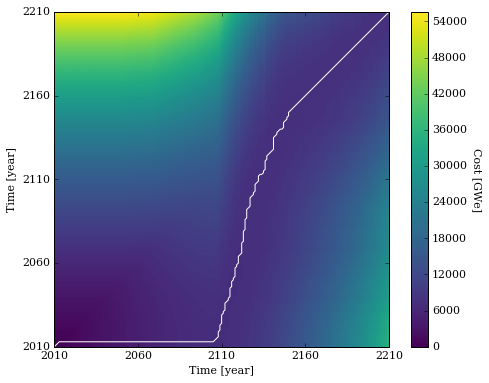

In [26]:
dist, cost, path = dtw.dtw(gwe_mu[:,np.newaxis], gwe_fr_mu[:,np.newaxis])
cont, cont_fr_t = display_dwt(gwe_mu, dist, cost, path, 'Total Model', 'FR Model')

In [27]:
n = len(gwe_mu)
dist, cost, path = dtw.dtw(gwe_mu[:,np.newaxis], np.zeros(len(gwe_mu), 'f8')[:,np.newaxis])
cost[-1, -1] / (2*n)

138.19977339863209

In [28]:
dtw.l1(gwe_mu, 0) / (2*n)

138.19977339863183

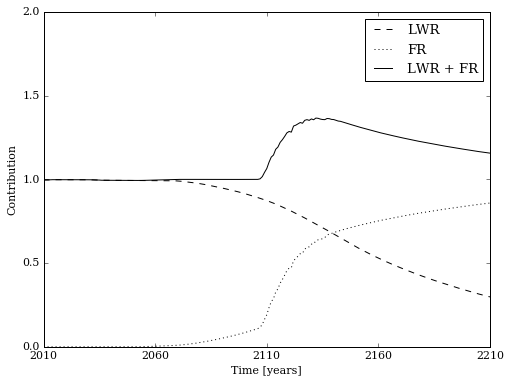

In [29]:
fig = plt.figure(figsize=(8, 6))
plt.plot(t, cont_lwr_t, 'k--', label='LWR')
plt.plot(t, cont_fr_t, 'k:', label='FR')
plt.plot(t, cont_lwr_t + cont_fr_t, 'k-', label='LWR + FR')
plt.axis([t[0], t[-1], 0.0, 2.0])
plt.xticks(np.linspace(t[0], t[-1], 5))
plt.xlabel('Time [years]')
plt.ylabel('Contribution')
plt.legend(loc=0)
fname = 'c-of-t'
plt.savefig(fname + '.png')
plt.savefig(fname + '.eps')
#plt.title('Contribution over Time')

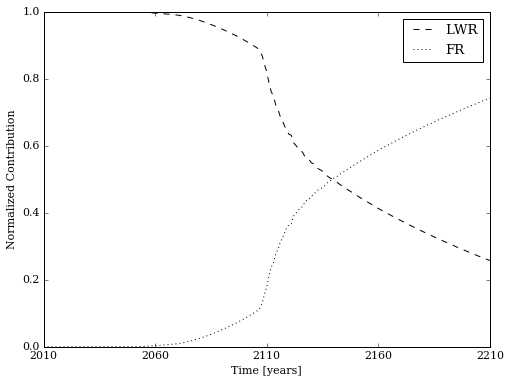

In [30]:
tot_cont_t = cont_lwr_t + cont_fr_t
fig = plt.figure(figsize=(8, 6))
plt.plot(t, cont_lwr_t / tot_cont_t, 'k--', label='LWR')
plt.plot(t, cont_fr_t / tot_cont_t, 'k:', label='FR')
plt.axis([t[0], t[-1], 0.0, 1.0])
plt.xticks(np.linspace(t[0], t[-1], 5))
plt.xlabel('Time [years]')
plt.ylabel('Normalized Contribution')
plt.legend(loc=0)
fname = 'normc-of-t'
plt.savefig(fname + '.png')
plt.savefig(fname + '.eps')

FFT
=====

In [31]:
n_fft = 256
def do_fft(data, fname, label):
    lwr_freq = np.fft.rfft(data, n=n_fft)
    low_pass = np.fft.irfft(lwr_freq[:int(n_fft/8)], n=len(t))
    print(low_pass[-1])
    fig = plt.figure(figsize=(8, 6))
    plt.plot(t, low_pass, 'k-', label='Low Pass Filter of ' + label)
    plt.plot(t, data, 'k--', label=label)
    ax = plt.axis()
    plt.axis([t[0], t[-1], ax[2], ax[3]])
    plt.xticks(np.linspace(t[0], t[-1], 5))
    plt.legend(loc=0)
    plt.xlabel('Time [year]')
    plt.ylabel('Generated Power [GWe]')
    plt.savefig(fname + '.png')
    plt.savefig(fname + '.eps')

36.5334306968


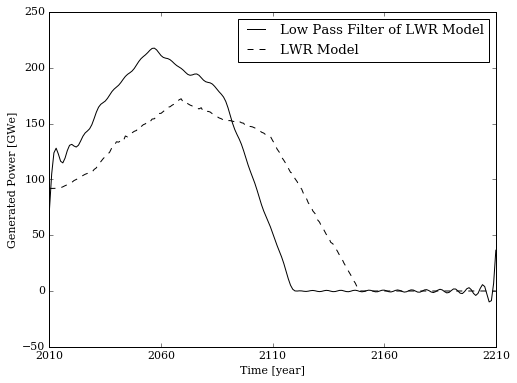

In [32]:
do_fft(gwe_lwr_mu, fname='fft-lwr-model', label='LWR Model')

35.8585742969


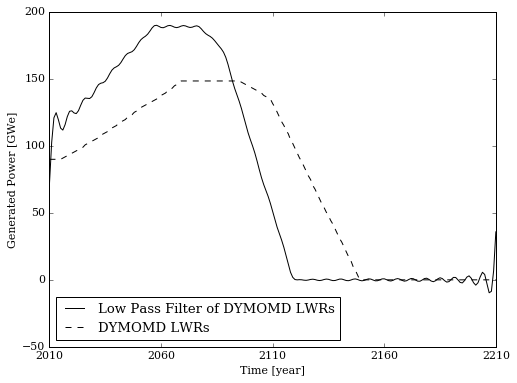

In [33]:
do_fft(gwe_lwr_sim0, fname='fft-lwr-dymond', label='DYMOMD LWRs')

37.2764512701


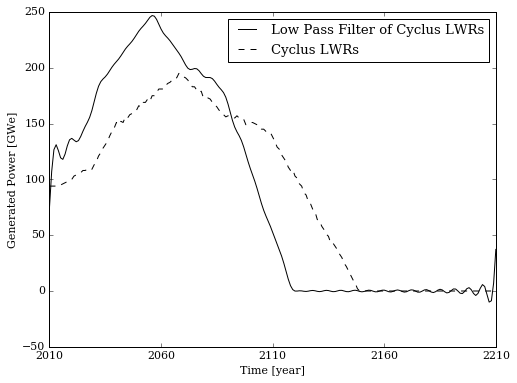

In [34]:
do_fft(gwe_lwr_sim1, fname='fft-lwr-cyclus', label='Cyclus LWRs')

MFCC
=========

In [35]:
import librosa
mfcc_params = dict(sr=1, n_mfcc=13, n_fft=128, hop_length=1)

/home/scopatz/miniconda/lib/python3.5/site-packages/librosa/core/audio.py:37: UserWarning: Could not import scikits.samplerate. Falling back to scipy.signal
  warnings.warn('Could not import scikits.samplerate. '


In [36]:
mfcc_lwr = librosa.feature.mfcc(gwe_lwr_mu, **mfcc_params).T
mfcc_tot = librosa.feature.mfcc(gwe_mu, **mfcc_params).T
dist, cost, path = dtw.dtw(mfcc_tot, mfcc_lwr)
cont = contribution_alt(mfcc_tot, dist)
print('Contribution is', cont)

Contribution is 0.575700368791


In [37]:
mfcc_fr = librosa.feature.mfcc(gwe_fr_mu, **mfcc_params).T
dist, cost, path = dtw.dtw(mfcc_tot, mfcc_fr)
cont = contribution_alt(mfcc_tot, dist)
print('Contribution is', cont)

Contribution is 0.896660492276


In [38]:
mfcc = librosa.feature.mfcc(gwe_lwr_mu, **mfcc_params).T

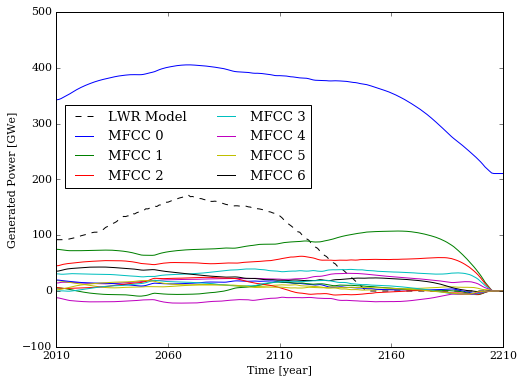

In [51]:
fig = plt.figure(figsize=(8, 6))
plt.plot(t, gwe_lwr_mu, 'k--', label='LWR Model')
n = 7
for i in range(n):
    plt.plot(t, mfcc[:len(t),i], label='MFCC ' + str(i))
plt.plot(t, mfcc[:len(t),n:])
ax = plt.axis()
plt.axis([t[0], t[-1], ax[2], ax[3]])
plt.xticks(np.linspace(t[0], t[-1], 5))
plt.legend(loc=(0.02, 0.475), ncol=2)
plt.xlabel('Time [year]')
plt.ylabel('Generated Power [GWe]')
fname = 'mfcc-lwr-model'
plt.savefig(fname + '.png')
plt.savefig(fname + '.eps')

In [40]:
mfcc.shape

(202, 13)